In [1]:
# import libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# loading data set
datasets.cifar10.load_data()

((array([[[[ 59,  62,  63],
           [ 43,  46,  45],
           [ 50,  48,  43],
           ...,
           [158, 132, 108],
           [152, 125, 102],
           [148, 124, 103]],
  
          [[ 16,  20,  20],
           [  0,   0,   0],
           [ 18,   8,   0],
           ...,
           [123,  88,  55],
           [119,  83,  50],
           [122,  87,  57]],
  
          [[ 25,  24,  21],
           [ 16,   7,   0],
           [ 49,  27,   8],
           ...,
           [118,  84,  50],
           [120,  84,  50],
           [109,  73,  42]],
  
          ...,
  
          [[208, 170,  96],
           [201, 153,  34],
           [198, 161,  26],
           ...,
           [160, 133,  70],
           [ 56,  31,   7],
           [ 53,  34,  20]],
  
          [[180, 139,  96],
           [173, 123,  42],
           [186, 144,  30],
           ...,
           [184, 148,  94],
           [ 97,  62,  34],
           [ 83,  53,  34]],
  
          [[177, 144, 116],
           [16

In [22]:
# splitting the dataset
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

# check shape of test and train
X_train.shape, X_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

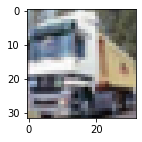

In [8]:
# plot the figure
plt.figure(figsize=(15,2))
plt.imshow(X_train[1])

In [13]:
# check shape and content of y_train
y_train.shape, y_train[:5]

((50000, 1), array([[6],
        [9],
        [9],
        [4],
        [1]], dtype=uint8))

In [14]:
# reshape y_train
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [9]:
# label classes 
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [15]:
# function to plot sample
def plot_sample(X, y, index): 
  plt.figure(figsize=(15,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])


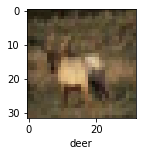

In [18]:
plot_sample(X_train, y_train, 3)


In [25]:
# normalise dataset
X_train =  X_train/255
X_test = X_test/255



In [26]:
# Build simple artificial neural network for image classification
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 128s 81ms/step - loss: 1.8091 - accuracy: 0.3562
Epoch 2/5
1563/1563 [==============================] - 124s 79ms/step - loss: 1.6205 - accuracy: 0.4288
Epoch 3/5
1563/1563 [==============================] - 124s 80ms/step - loss: 1.5417 - accuracy: 0.4562
Epoch 4/5
1563/1563 [==============================] - 120s 77ms/step - loss: 1.4822 - accuracy: 0.4768
Epoch 5/5
1563/1563 [==============================] - 122s 78ms/step - loss: 1.4325 - accuracy: 0.4952


We can see that at the end of 5 epochs, accuracy is at around 49%

In [27]:
# Printing classification report
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np

y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.63      0.41      0.50      1000
           1       0.58      0.62      0.60      1000
           2       0.49      0.12      0.20      1000
           3       0.34      0.38      0.36      1000
           4       0.44      0.41      0.42      1000
           5       0.58      0.15      0.23      1000
           6       0.37      0.76      0.49      1000
           7       0.60      0.50      0.54      1000
           8       0.43      0.80      0.56      1000
           9       0.54      0.51      0.52      1000

    accuracy                           0.47     10000
   macro avg       0.50      0.47      0.44     10000
weighted avg       0.50      0.47      0.44     10000



In [28]:
# Build CNN model
cnn = models.Sequential([
    
    # cnn
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    # dense 
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])


In [30]:
# compile model
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [31]:
# fit
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 81s 51ms/step - loss: 1.4545 - accuracy: 0.4814
Epoch 2/10
1563/1563 [==============================] - 70s 45ms/step - loss: 1.1092 - accuracy: 0.6129
Epoch 3/10
1563/1563 [==============================] - 68s 44ms/step - loss: 0.9780 - accuracy: 0.6587
Epoch 4/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.8926 - accuracy: 0.6900
Epoch 5/10
1563/1563 [==============================] - 68s 44ms/step - loss: 0.8308 - accuracy: 0.7100
Epoch 6/10
1563/1563 [==============================] - 69s 44ms/step - loss: 0.7681 - accuracy: 0.7331
Epoch 7/10
1563/1563 [==============================] - 68s 44ms/step - loss: 0.7148 - accuracy: 0.7519
Epoch 8/10
1563/1563 [==============================] - 69s 44ms/step - loss: 0.6710 - accuracy: 0.7655
Epoch 9/10
1563/1563 [==============================] - 67s 43ms/step - loss: 0.6329 - accuracy: 0.7807
Epoch 10/10
1563/1563 [==============================] - 69s 44m

In [32]:
# test
cnn.evaluate(X_test, y_test)

313/313 [==============================] - 6s 14ms/step - loss: 0.9339 - accuracy: 0.6970


[0.9339272379875183, 0.6970000267028809]

In [33]:
# reshaping y_test
y_test = y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

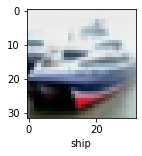

In [34]:
# plot y_test
plot_sample(X_test, y_test, 1)

In [35]:
# predict 
y_pred = cnn.predict(X_test)
y_pred[:5]

array([[1.0947435e-05, 5.2670277e-08, 2.3351992e-03, 9.9195099e-01,
        2.3642820e-04, 2.2145219e-03, 3.0143270e-03, 8.8981729e-08,
        2.3745067e-04, 2.9457006e-08],
       [1.5469356e-03, 5.6954002e-01, 2.9164486e-08, 5.5705476e-09,
        7.0250733e-10, 7.8112178e-10, 1.6693389e-07, 1.3195196e-09,
        4.2870888e-01, 2.0398482e-04],
       [2.2683266e-01, 1.9322841e-01, 5.6468863e-03, 1.1409858e-03,
        1.6994502e-04, 2.2953871e-04, 6.0763932e-04, 6.9344242e-04,
        5.2456874e-01, 4.6881761e-02],
       [8.4089947e-01, 3.7540037e-02, 5.7993288e-04, 4.1381812e-05,
        1.5601516e-05, 3.7275895e-06, 4.2541433e-04, 8.7424487e-06,
        1.1855352e-01, 1.9321559e-03],
       [1.1391803e-07, 6.0867256e-05, 2.1091828e-03, 5.9839424e-02,
        1.6239281e-01, 4.7398494e-03, 7.7069300e-01, 4.3934351e-06,
        1.5791121e-04, 2.5179932e-06]], dtype=float32)

In [36]:
# coverting into y_classes
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 1, 8, 0, 6]

In [38]:
# comparing y_test and y_pred
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

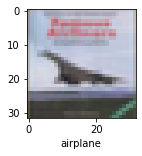

In [39]:
# plotting samples
plot_sample(X_test, y_test, 3)

In [40]:
classes[y_classes[3]]

'airplane'

In [41]:
# Print classification report 
print("Classification Report: \n", classification_report(y_test, y_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.75      0.76      0.76      1000
           1       0.84      0.78      0.81      1000
           2       0.51      0.66      0.58      1000
           3       0.53      0.48      0.50      1000
           4       0.67      0.59      0.63      1000
           5       0.64      0.59      0.61      1000
           6       0.73      0.78      0.75      1000
           7       0.77      0.72      0.74      1000
           8       0.79      0.82      0.81      1000
           9       0.78      0.80      0.79      1000

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.70     10000
weighted avg       0.70      0.70      0.70     10000

